In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)
outdir = "/groups/icecube/peter/workspace/analyses/multiclassification_track_cascade_neutrinos/plots/lvl3_variables_dist_and_cuts/"

In [2]:
# MC_database_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# RD_database_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/dev_lvl3_genie_burnsample/dev_lvl3_genie_burnsample_v5.db"
# lvl3_variables_MC_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db_3/NOT_full_db_osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_truth_and_lvl3_variables.db"
# lvl3_variables_RD_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_0.01_percent_burnsample_Peter/merged_db/Burnsample_lvl3_v02.00_lvl3_variables.db"
# with sql.connect(MC_database_indir) as con:
#         query = f"""
#         SELECT
#             event_no, RunID, SubRunID, EventID, SubEventID
#         FROM 
#             truth
#         """
#         truth_MC = read_sql(query,con)

# with sql.connect(lvl3_variables_MC_indir) as con:
#         query = f"""
#         SELECT
#             event_no, RunID, SubRunID, EventID, SubEventID, C2HR6, CausalVetoHits, CleanedFullTimeLength, DCFiducialHits, L3_oscNext_bool, NAbove200Hits, NchCleaned, NoiseEngineNoCharge, RTVetoCutHit, STW9000_DTW300Hits, UncleanedFullTimeLength, VertexGuessZ, VetoFiducialRatioHits
#         FROM 
#             truth
#         """
#         lvl3_variables_MC = read_sql(query,con)

In [3]:
# print(len(truth_MC))
# lvl3_variables_MC = lvl3_variables_MC.drop(columns='event_no')
# lvl3_variables_MC_to_save = pd.merge(truth_MC.reset_index(drop=True),lvl3_variables_MC.reset_index(drop=True),on=['RunID', 'SubrunID', 'EventID', 'SubEventID'],how='inner')
# print(len(lvl3_variables_MC_to_save))
# MC_save_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
# lvl3_variables_MC_to_save.to_csv(MC_save_dir + 'lvl3_variables_new_muon.csv')

In [4]:
# with sql.connect(RD_database_indir) as con:
#         query = f"""
#         SELECT
#             event_no, RunID, SubRunID, EventID, SubEventID
#         FROM 
#             truth
#         """
#         truth_RD = read_sql(query,con)

# with sql.connect(lvl3_variables_RD_indir) as con:
#         query = f"""
#         SELECT
#             event_no, RunID, SubRunID, EventID, SubEventID, C2HR6, CausalVetoHits, CleanedFullTimeLength, DCFiducialHits, L3_oscNext_bool, NAbove200Hits, NchCleaned, NoiseEngineNoCharge, RTVetoCutHit, STW9000_DTW300Hits, UncleanedFullTimeLength, VertexGuessZ, VetoFiducialRatioHits
#         FROM 
#             truth
#         """
#         lvl3_variables_RD = read_sql(query,con)

In [5]:
# print(len(truth_RD))
# lvl3_variables_RD.drop(columns='event_no')
# lvl3_variables_RD_to_save = pd.merge(truth_RD.reset_index(drop=True),lvl3_variables_RD.reset_index(drop=True),on=['RunID', 'SubRunID', 'EventID', 'SubEventID'],how='inner')
# print(len(lvl3_variables_RD_to_save))
# RD_save_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/"
# lvl3_variables_RD_to_save.to_csv(RD_save_dir + 'lvl3_variables_burnsample.csv')

In [6]:
useful_columns = ['event_no',
       'C2HR6', 'CausalVetoHits', 'CleanedFullTimeLength', 'DCFiducialHits',
       'L3_oscNext_bool', 'NAbove200Hits', 'NchCleaned', 'NoiseEngineNoCharge',
       'RTVetoCutHit', 'STW9000_DTW300Hits', 'UncleanedFullTimeLength',
       'VertexGuessZ', 'VetoFiducialRatioHits']

lvl3_variables_MC_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/lvl3_variables_new_muon.csv"
lvl3_variables_MC = pd.read_csv(lvl3_variables_MC_indir,usecols=useful_columns)
lvl3_variables_RD_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/lvl3_variables_burnsample.csv"
lvl3_variables_RD = pd.read_csv(lvl3_variables_RD_indir,usecols=useful_columns)
Multiclass_MC_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
Multiclass_MC = pd.read_csv(Multiclass_MC_indir)
Multiclass_RD_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"
Multiclass_RD = pd.read_csv(Multiclass_RD_indir)

In [ ]:
print(len(Multiclass_MC))
print(len(lvl3_variables_MC))
lvl3_variables_MC = lvl3_variables_MC[lvl3_variables_MC['event_no'].isin(Multiclass_MC['event_no'].to_list())]
print(len(lvl3_variables_MC))

print(len(Multiclass_RD))
print(len(lvl3_variables_RD))
lvl3_variables_RD = lvl3_variables_RD[lvl3_variables_RD['event_no'].isin(Multiclass_RD['event_no'].to_list())]
print(len(lvl3_variables_RD))

37235782
38885781
37235782
61739862
61739862
61739862


In [ ]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
print(len(osc_weight_MC))
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])

38885781
          event_no  osc_weight
28956376  28956376         NaN
          event_no  osc_weight
28956376  28956376         0.0


/tmp/ipykernel_25642/382299087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0


In [ ]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_muon_i3_files = 1093
nr_noise_i3_files = 401

nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 169737 + 550000
nr_noise_total = 321103 + 550000

nr_electron_neutrinos_test = 8118575
nr_muon_neutrinos_test = 19923619
nr_tau_neutrinos_test = 8702748
nr_muon_test = 169737
nr_noise_test =321103

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = Multiclass_MC['event_no'][Multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

print(nr_electron_neutrinos_test+nr_muon_neutrinos_test+nr_tau_neutrinos_test+nr_muon_test+nr_noise_test)

0.001698641060838674 0.0006648233149566109 0.0030570841456206404


/tmp/ipykernel_25642/4276125605.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
/tmp/ipykernel_25642/4276125605.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_25642/4276125605.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

37235782


In [ ]:
lvl3_variables_MC = pd.merge(lvl3_variables_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
Multiclass_MC = pd.merge(Multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)


In [ ]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)
lvl3_variables_RD['osc_weight'] = np.ones(len(lvl3_variables_RD))*Burnsample_weight 
Multiclass_RD['osc_weight'] = np.ones(len(Multiclass_RD))*Burnsample_weight 

In [ ]:
Use_all = True
if not Use_all:
    lvl3_variables_MC_plot = lvl3_variables_MC.sample(frac = 0.05)
    lvl3_variables_RD_plot = lvl3_variables_RD.sample(frac = 0.05)
else:
    lvl3_variables_MC_plot = lvl3_variables_MC
    lvl3_variables_RD_plot = lvl3_variables_RD


In [ ]:
print(len(lvl3_variables_MC_plot))
print(len(lvl3_variables_RD_plot))
print(lvl3_variables_MC_plot.columns)
print(lvl3_variables_RD_plot.columns)

37235782
61739862
Index(['event_no', 'C2HR6', 'CausalVetoHits', 'CleanedFullTimeLength',
       'DCFiducialHits', 'L3_oscNext_bool', 'NAbove200Hits', 'NchCleaned',
       'NoiseEngineNoCharge', 'RTVetoCutHit', 'STW9000_DTW300Hits',
       'UncleanedFullTimeLength', 'VertexGuessZ', 'VetoFiducialRatioHits',
       'osc_weight'],
      dtype='object')
Index(['event_no', 'C2HR6', 'CausalVetoHits', 'CleanedFullTimeLength',
       'DCFiducialHits', 'L3_oscNext_bool', 'NAbove200Hits', 'NchCleaned',
       'NoiseEngineNoCharge', 'RTVetoCutHit', 'STW9000_DTW300Hits',
       'UncleanedFullTimeLength', 'VertexGuessZ', 'VetoFiducialRatioHits',
       'osc_weight'],
      dtype='object')


In [ ]:


# for column in lvl3_variables_MC_plot.columns:
#     if not column in ['Unnamed: 0','event_no','RunID','EventID','SubrunID','SubEventID','osc_weight']:
#         if column == 'VetoFiducialRatioHits':
#             plt.figure()
#             plt.title(column)
#             plt.hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot[column]<10000],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot[column]<10000],bins=100,label='MC total',histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos))],weights=lvl3_variables_MC_plot['osc_weight'][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos))],bins=100,label='MC Neutrinos',histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(muon_event_nos))],weights=lvl3_variables_MC_plot['osc_weight'][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(muon_event_nos))],bins=100,label='MC Muons',histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(noise_event_nos))],weights=lvl3_variables_MC_plot['osc_weight'][(lvl3_variables_MC_plot[column]<10000)&(lvl3_variables_MC_plot['event_no'].isin(noise_event_nos))],bins=100,label='MC Noise',histtype='step',density=False)
#             plt.hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot[column]<10000],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot[column]<10000],bins=100,label='RD',histtype='step',density=False)
#             plt.yscale('log')
#             plt.legend()
#         else:
#             plt.figure()
#             plt.title(column)
#             plt.hist(lvl3_variables_MC_plot[column],bins=100,label='MC',weights=lvl3_variables_MC_plot['osc_weight'],histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],bins=100,label='MC Neutrinos',histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],bins=100,label='MC Muons',histtype='step',density=False)
#             plt.hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],bins=100,label='MC Noise',histtype='step',density=False)
#             plt.hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=100,label='RD',histtype='step',density=False)
#             plt.yscale('log')
#             plt.legend()

In [ ]:
MC_scaling = np.sum(lvl3_variables_RD_plot['osc_weight'])/np.sum(lvl3_variables_MC_plot['osc_weight'])
print(MC_scaling)

1.4109562758077028


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


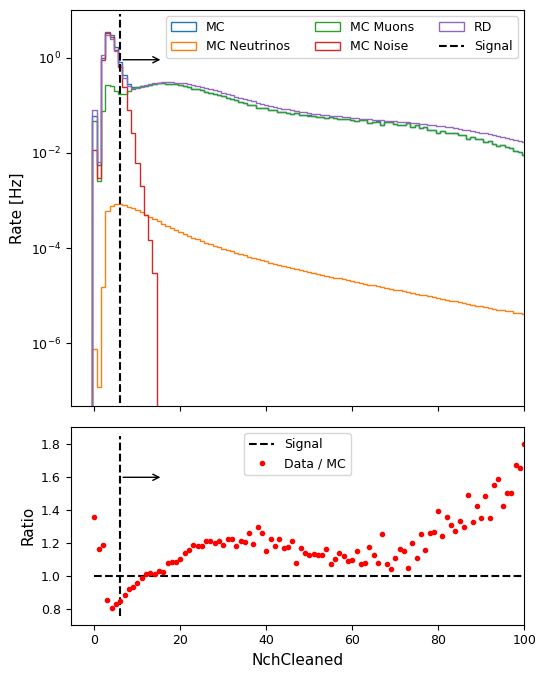

In [ ]:

column = 'NchCleaned'
bins = np.linspace(-0.5,100.5,102)
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_xlim(right=100)
cut = 6
top_arrow = 0.9
lenght_arrow = 10
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].set_ylim(top=10)
axs[0].legend(ncol=3, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 1.6
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_ylim(top=10)
axs[1].legend(loc='upper center')


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)


[-0.5  0.5  1.5]


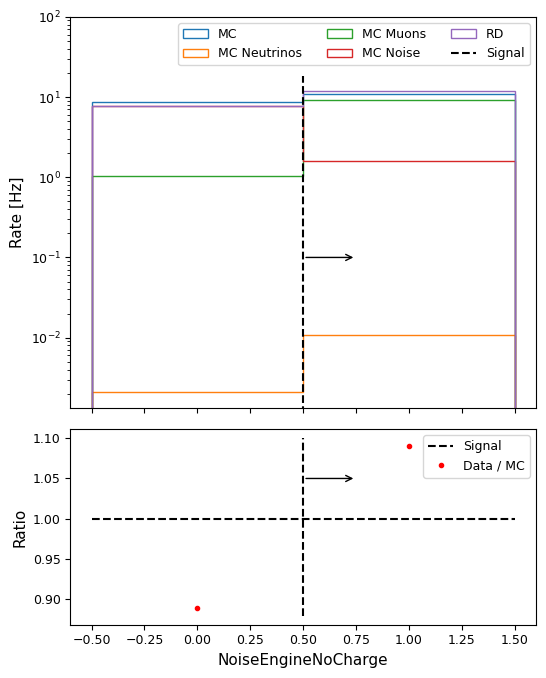

In [ ]:

column = 'NoiseEngineNoCharge'
bins = np.linspace(-0.5,1.5,3)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 0.5
top_arrow = 0.1
lenght_arrow = 0.25
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].set_ylim(top=100)
axs[0].legend(ncol=3, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 1.05
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


/tmp/ipykernel_25642/1754793448.py:29: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts


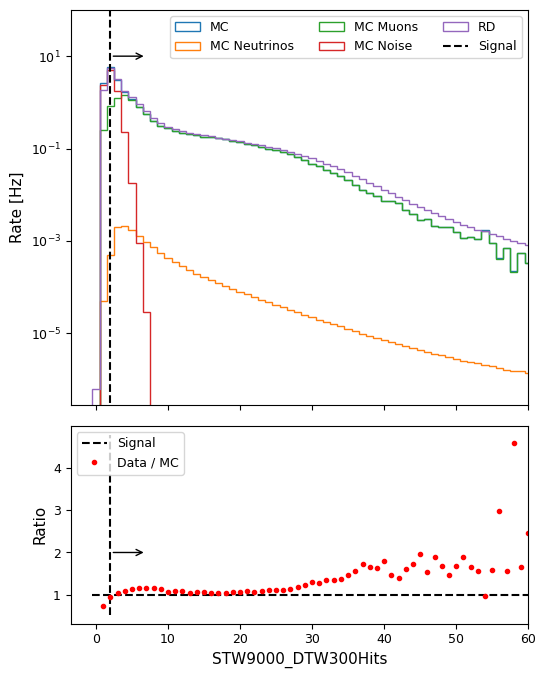

In [ ]:

column = 'STW9000_DTW300Hits'
bins = np.linspace(-0.5,60.5,62)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 2
top_arrow = 10
lenght_arrow = 5
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))

axs[0].legend(ncol=3, loc='upper right')
axs[0].set_xlim(right=60)
ratio = RD_counts/MC_counts
ratio_top_arrow = 2
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[1].set_xlim(right=60)
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


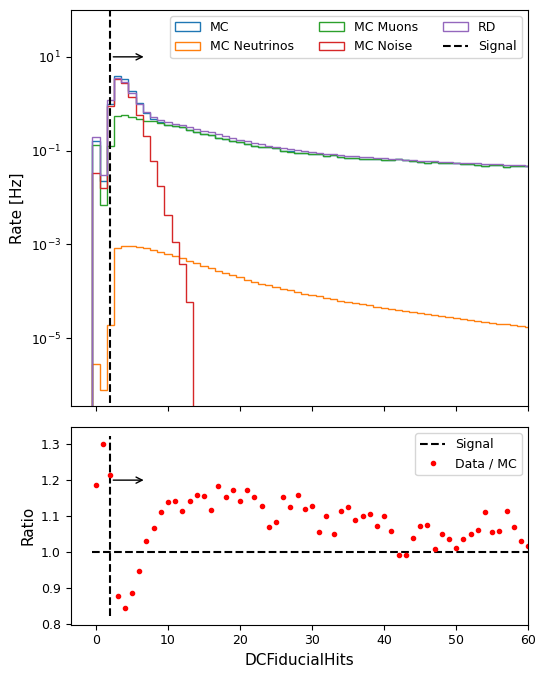

In [ ]:

column = 'DCFiducialHits'
bins = np.linspace(-0.5,60.5,62)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 2
top_arrow = 10
lenght_arrow = 5
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
axs[0].set_xlim(right=60)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.2
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[1].set_xlim(right=60)
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


/tmp/ipykernel_25642/1841831832.py:28: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts


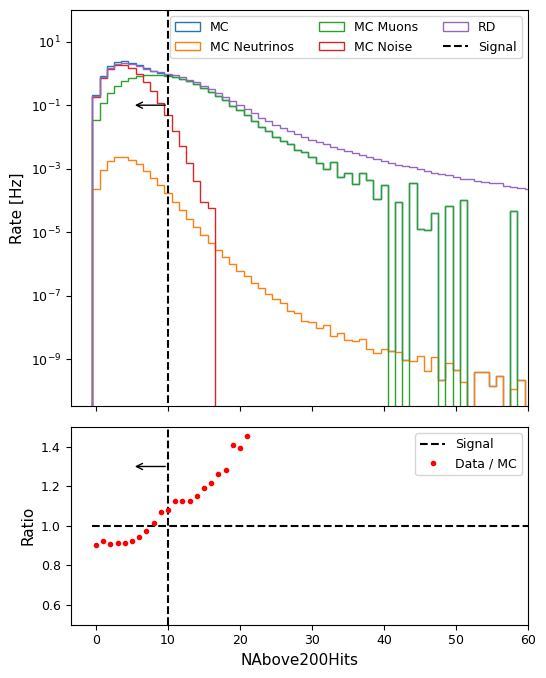

In [ ]:

column = 'NAbove200Hits'
bins = np.linspace(-0.5,60.5,62)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 10
top_arrow = 0.1
lenght_arrow = 5
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut-lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
axs[0].set_xlim(right=60)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.3
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
axs[1].set_ylim(top=1.5,bottom=0.5)
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut-lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[1].set_xlim(right=60)

axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[-500. -490. -480. -470. -460. -450. -440. -430. -420. -410.]


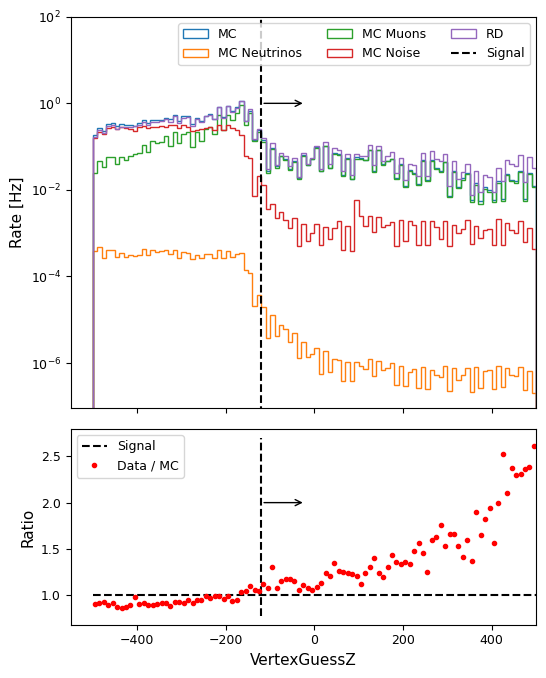

In [ ]:
column = 'VertexGuessZ'
bins = np.linspace(-500,500,101)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = -120
top_arrow = 1
lenght_arrow = 100
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
axs[0].set_xlim(right=500)
ratio = RD_counts/MC_counts
ratio_top_arrow = 2
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[1].set_xlim(right=500)
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


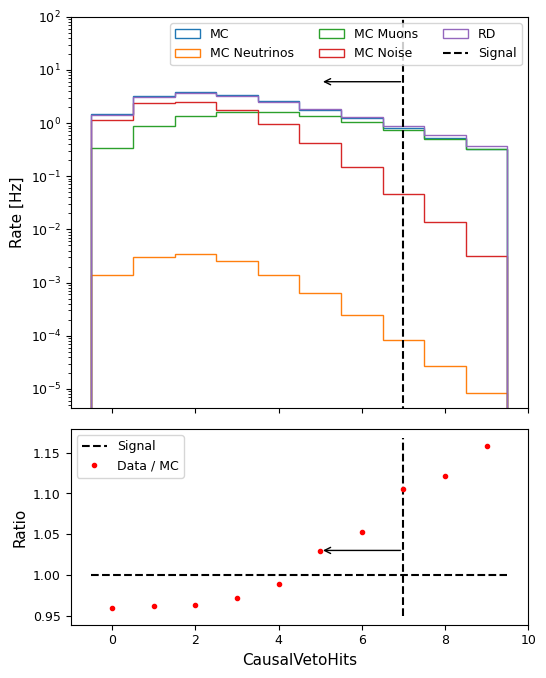

In [ ]:

column = 'CausalVetoHits'
bins = np.linspace(-0.5,9.5,11)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 7
top_arrow = 6
lenght_arrow = -2
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
axs[0].set_xlim(right=10)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.03
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[1].set_xlim(right=10)
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[0.001      0.00126486 0.00159986 0.00202359 0.00255955 0.00323746
 0.00409492 0.00517947 0.00655129 0.00828643]


/tmp/ipykernel_25642/1298865776.py:30: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1298865776.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


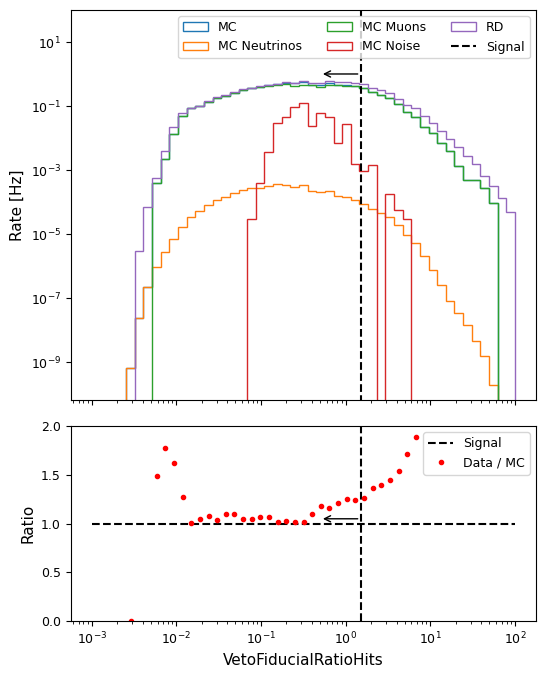

In [ ]:

column = 'VetoFiducialRatioHits'
bins = np.logspace(-3,2,50)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_xscale('log')

#axs[0].set_xlim(right=100)
cut = 1.5
top_arrow = 1
lenght_arrow = -1
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
#axs[0].set_xlim(right=10)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.05
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].set_xscale('log')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
axs[1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_xlim(right=10)

axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


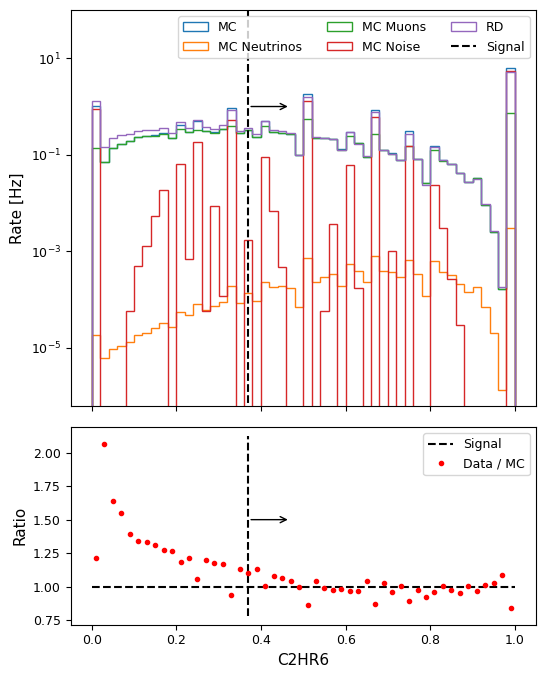

In [ ]:

column = 'C2HR6'
bins = np.linspace(0,1,51)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 0.37
top_arrow = 1
lenght_arrow = 0.1
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
#axs[0].set_xlim(right=10)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.5
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_xlim(right=10)
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[-0.5  0.5  1.5]


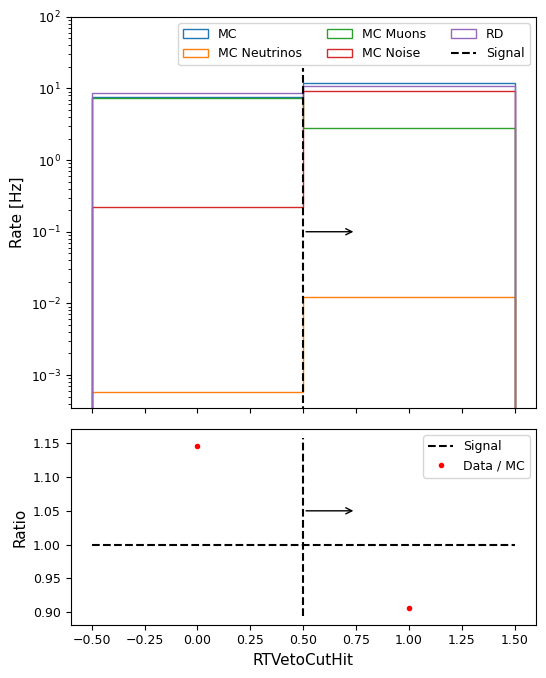

In [ ]:

column = 'RTVetoCutHit'
bins = np.linspace(-0.5,1.5,3)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 0.5
top_arrow = 0.1
lenght_arrow = 0.25
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].set_ylim(top=100)
axs[0].legend(ncol=3, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 1.05
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_ylim(top=10)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[   0.  400.  800. 1200. 1600. 2000. 2400. 2800. 3200. 3600.]


/tmp/ipykernel_25642/3877844211.py:28: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts


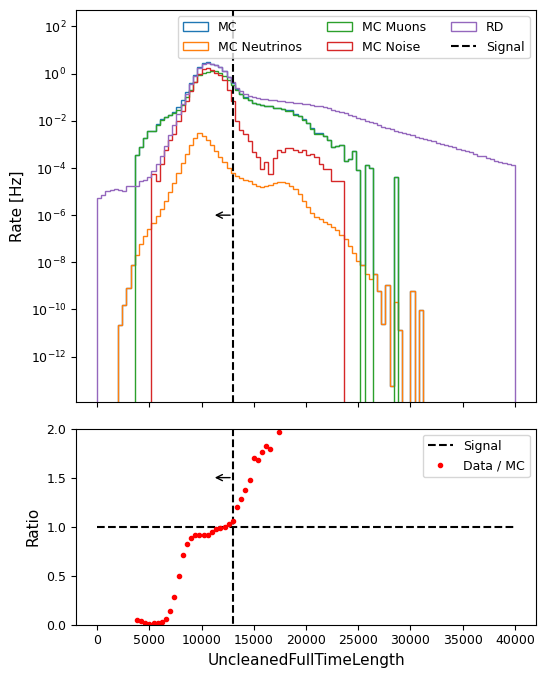

In [ ]:

column = 'UncleanedFullTimeLength'
bins = np.linspace(0,40000,101)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 13000
top_arrow = 10**(-6)
lenght_arrow = -2000
axs[0].set_ylim(top=500)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
#axs[0].set_xlim(right=10)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.5
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_xlim(right=10)
axs[1].set_ylim(top=2,bottom=0)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

[   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800.]


/tmp/ipykernel_25642/1882689965.py:28: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts


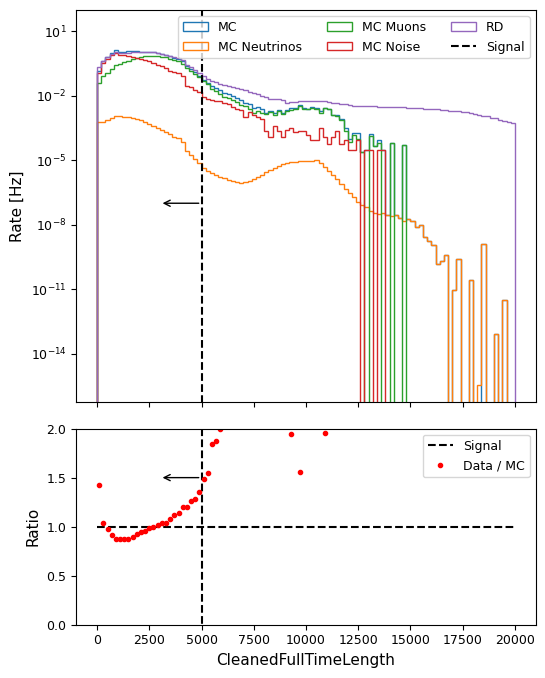

In [ ]:

column = 'CleanedFullTimeLength'
bins = np.linspace(0,20000,101)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_=  axs[0].hist(lvl3_variables_MC_plot[column],bins=bins,label='MC',weights=lvl3_variables_MC_plot['osc_weight']*MC_scaling,histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(neutrino_event_nos)]*MC_scaling,bins=bins,label='MC Neutrinos',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(muon_event_nos)]*MC_scaling,bins=bins,label='MC Muons',histtype='step',density=False)
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)],weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(noise_event_nos)]*MC_scaling,bins=bins,label='MC Noise',histtype='step',density=False)
RD_counts, _,_ = axs[0].hist(lvl3_variables_RD_plot[column],weights=lvl3_variables_RD_plot['osc_weight'],bins=bins,label='RD',histtype='step',density=False)
#axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
#axs[0].set_xlim(right=100)
cut = 5000
top_arrow = 10**(-7)
lenght_arrow = -2000
axs[0].set_ylim(top=100)
ylimits = axs[0].get_ylim()
axs[0].vlines(cut,0,ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
axs[0].legend(ncol=3, loc='upper right')
#axs[0].set_xlim(right=10)
ratio = RD_counts/MC_counts
ratio_top_arrow = 1.5
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1].get_ylim()
axs[1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1].set_xlim(right=10)
axs[1].set_ylim(top=2,bottom=0)
axs[1].legend()


fig.tight_layout()
fig.savefig(outdir + f'{column}',bbox_inches='tight',dpi=200)

In [28]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

#safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
#load_logit_MC = True
#if load_logit_MC:
#    input = pd.read_csv(safe_load_place_MC)
#    Multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
Multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(Multiclass_MC['pid_neutrino_pred']).apply(to_logit)


# safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
# load_logit_RD = True
# if load_logit_RD:
#     input = pd.read_csv(safe_load_place_RD)
#     Multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
Multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(Multiclass_RD['pid_neutrino_pred']).apply(to_logit)

In [29]:
indir_track_cascade_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_track_cascade_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"

track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
track_cascade_RD = pd.read_csv(indir_track_cascade_RD).sort_values('event_no').reset_index(drop = True)

In [30]:
Neutrino_cut = 12
pure_neutrino_selection_RD = Multiclass_RD['event_no'][Multiclass_RD['pid_neutrino_pred_logit'] > Neutrino_cut]
pure_neutrino_selection_MC_noise_and_muons = Multiclass_MC['event_no'][(Multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (Multiclass_MC['pid'].isin((-13,13,-1,1)))]
pure_neutrino_selection_MC = Multiclass_MC['event_no'][(Multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (Multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
print('There are this many muons and noise selected away:',len(pure_neutrino_selection_MC_noise_and_muons))
print(Multiclass_MC['pid'][Multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())].value_counts())

There are this many muons and noise selected away: 4
 14.0    4529302
 16.0    2345916
 12.0    2026974
-14.0    1988173
-12.0     896529
-16.0     882725
Name: pid, dtype: int64


In [31]:
print(pure_neutrino_selection_MC_noise_and_muons.to_list())

[1995276.0, 36628082.0, 37560539.0, 9236982.0]


In [32]:
track_cut = 0.9
cascade_cut = 0.5
pure_track_event_no_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred']>track_cut)]# & (track_cascade_MC['track_mu_pred'] < track_cut_2) ]
pure_track_event_no_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred']>track_cut)]# & (track_cascade_RD['track_mu_pred'] < track_cut_2)]


pure_cascade_event_no_MC = track_cascade_MC['event_no'][track_cascade_MC['track_mu_pred']<cascade_cut]
pure_cascade_event_no_RD = track_cascade_RD['event_no'][track_cascade_RD['track_mu_pred']<cascade_cut]


pure_track_selection_MC = pure_track_event_no_MC[pure_track_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_track_selection_RD = pure_track_event_no_RD[pure_track_event_no_RD.isin(pure_neutrino_selection_RD)]


pure_cascade_selection_MC = pure_cascade_event_no_MC[pure_cascade_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_cascade_selection_RD = pure_cascade_event_no_RD[pure_cascade_event_no_RD.isin(pure_neutrino_selection_RD)]

print(len(pure_track_selection_MC))
print(len(pure_track_selection_RD))
print(len(pure_cascade_selection_MC))
print(len(pure_cascade_selection_RD))

1872299
3459
8039145
11256


In [33]:
outdir_comparison = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/lvl3_variables_distributions/track_cascade_selection_MC_RD_lvl3_variables_comparison/"

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


/tmp/ipykernel_25642/3230263520.py:33: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts


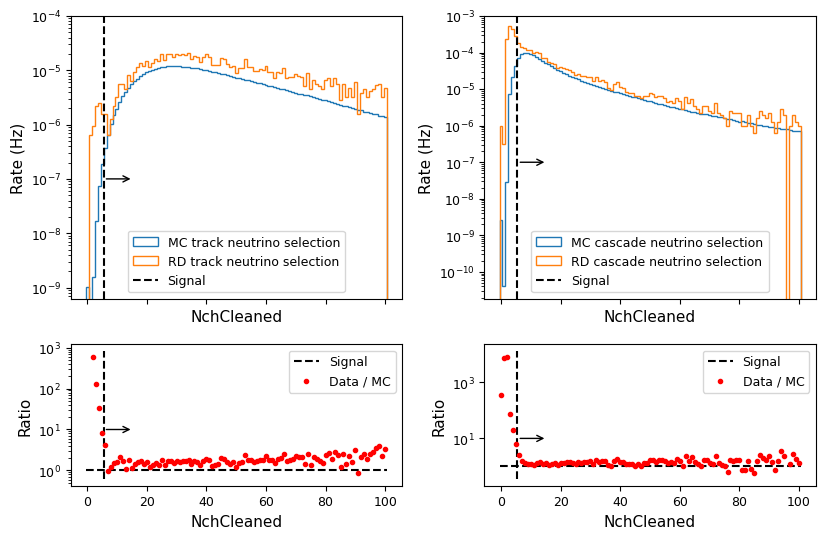

In [106]:



bins = np.linspace(-0.5,100.5,102)
column = 'NchCleaned'
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 5.5
top_arrow = 10**(-7)
lenght_arrow = 10
axs[0,0].set_ylim(top=10**(-4))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='lower center')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=0.8)

cut = 5.5
top_arrow = 10**(-7)
lenght_arrow = 10
axs[0,1].set_ylim(top=10**(-3))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='lower center')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')


[-0.5  0.5  1.5]


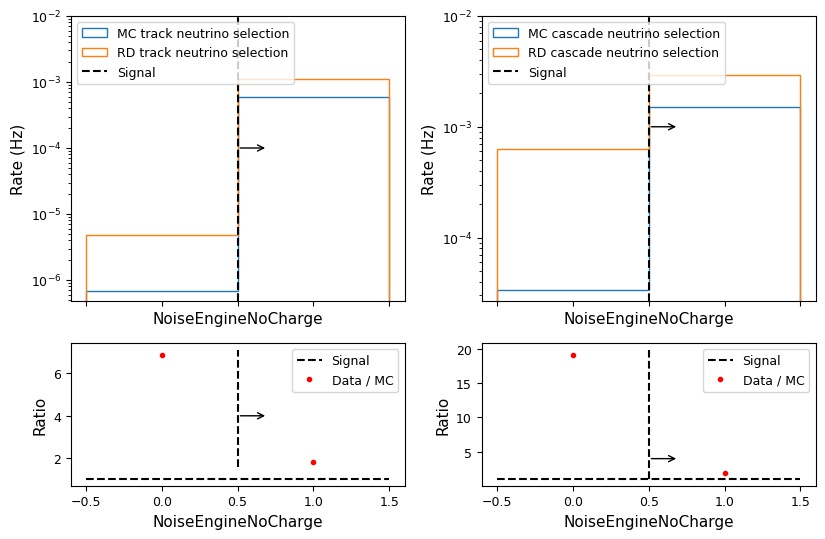

In [105]:


column = 'NoiseEngineNoCharge'
bins = np.linspace(-0.5,1.5,3)
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 0.5
top_arrow = 10**(-4)
lenght_arrow = 0.2
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper left')

ratio = RD_counts/MC_counts
ratio_top_arrow = 4
#axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=0.8)

cut = 0.5
top_arrow = 10**(-3)
lenght_arrow = 0.2
axs[0,1].set_ylim(top=10**(-2))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper left')

ratio = RD_counts/MC_counts
ratio_top_arrow = 4
#axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')




[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


/tmp/ipykernel_25642/1230958757.py:33: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1230958757.py:69: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


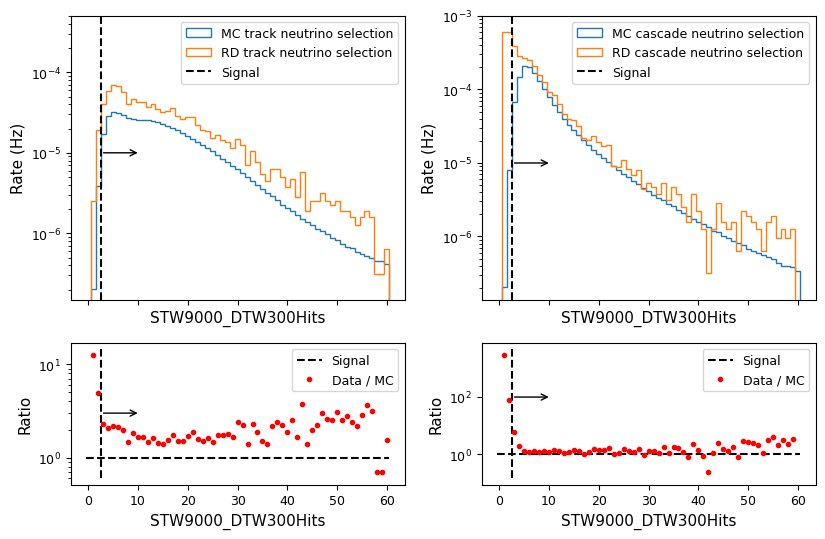

In [111]:


column = 'STW9000_DTW300Hits'
bins = np.linspace(-0.5,60.5,62)
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 2.5
top_arrow = 10**(-5)
lenght_arrow = 8
axs[0,0].set_ylim(top=5*10**(-4))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 3
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 2.5
top_arrow = 10**(-5)
lenght_arrow = 8
axs[0,1].set_ylim(top=10**(-3))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 100
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')



[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


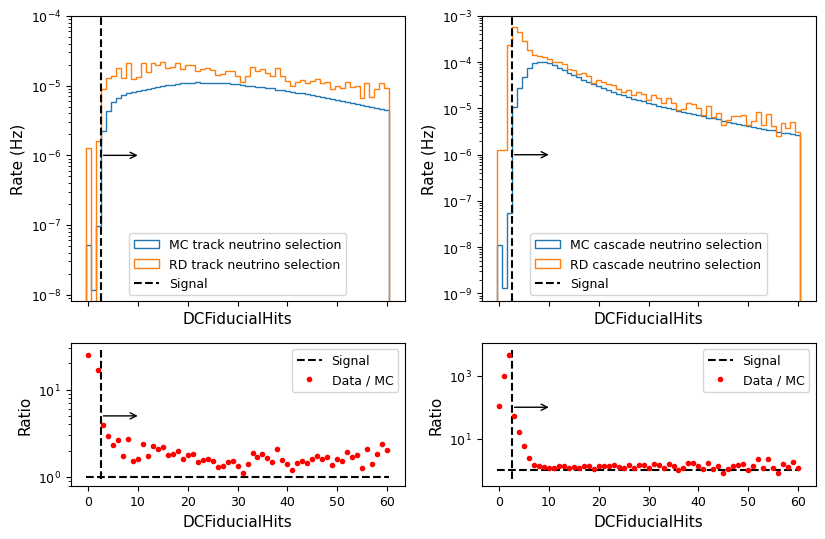

In [110]:

column = 'DCFiducialHits'
bins = np.linspace(-0.5,60.5,62)
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 2.5
top_arrow = 10**(-6)
lenght_arrow = 8
axs[0,0].set_ylim(top=10**(-4))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='lower center')

ratio = RD_counts/MC_counts
ratio_top_arrow = 5
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 2.5
top_arrow = 10**(-6)
lenght_arrow = 8
axs[0,1].set_ylim(top=10**(-3))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='lower center')

ratio = RD_counts/MC_counts
ratio_top_arrow = 100
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


/tmp/ipykernel_25642/1000229502.py:33: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1000229502.py:33: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1000229502.py:69: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1000229502.py:69: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


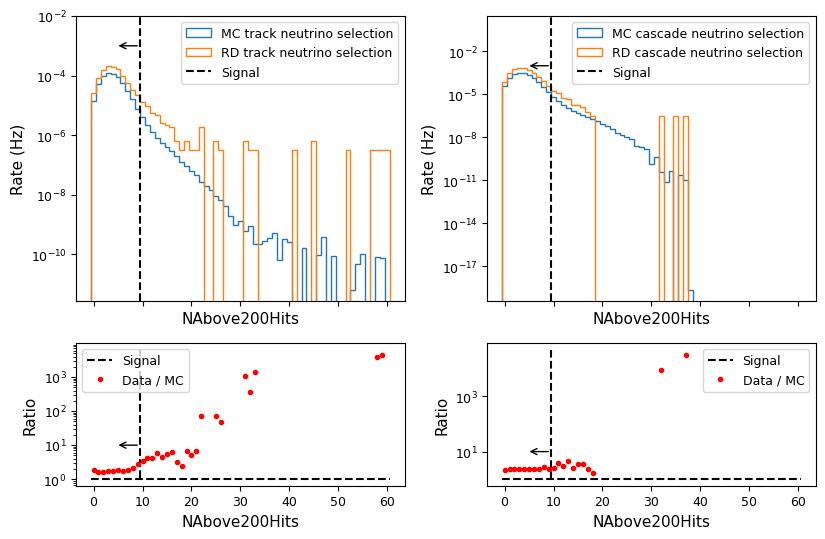

In [112]:

column = 'NAbove200Hits'
bins = np.linspace(-0.5,60.5,62)
print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 9.5
top_arrow = 10**(-3)
lenght_arrow = -5
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 9.5
top_arrow = 10**(-3)
lenght_arrow = -5
axs[0,1].set_ylim(top=3)
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')




[-500. -490. -480. -470. -460. -450. -440. -430. -420. -410.]


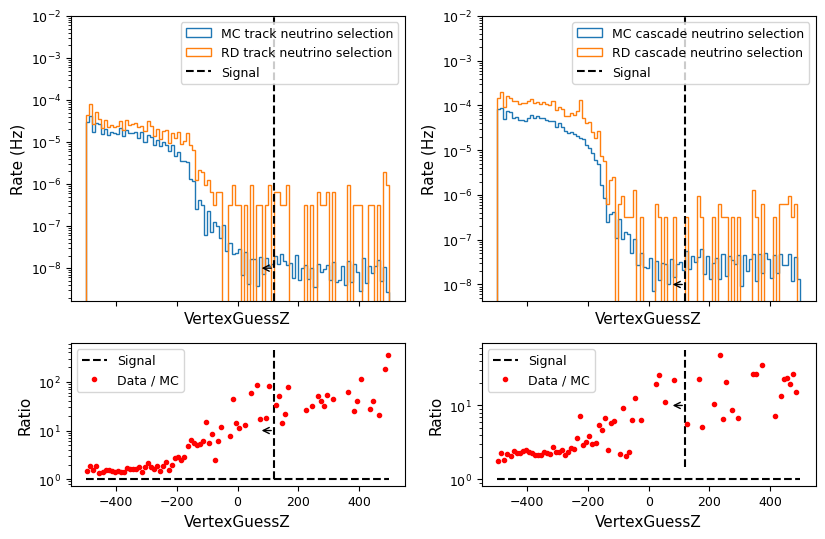

In [114]:

column = 'VertexGuessZ'
bins = np.linspace(-500,500,101)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 120
top_arrow = 10**(-8)
lenght_arrow = -50
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 120
top_arrow = 10**(-8)
lenght_arrow = -50
axs[0,1].set_ylim(top=10**(-2))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


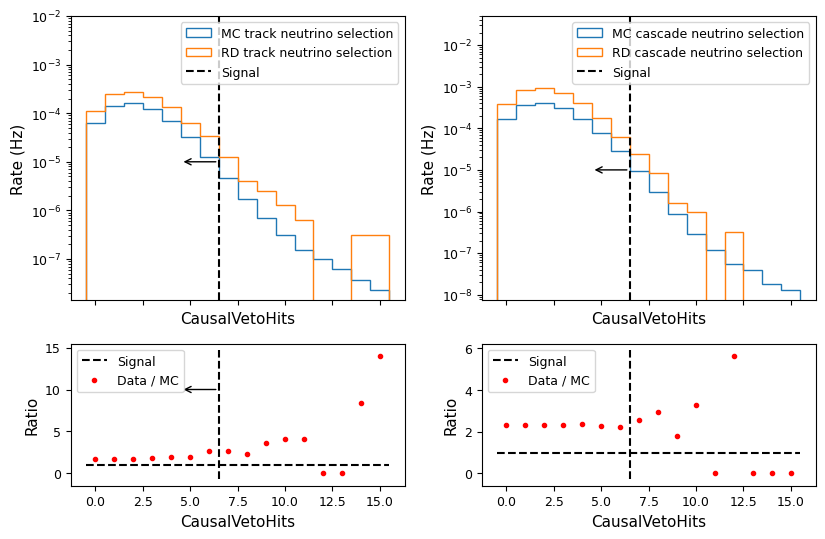

In [117]:

column = 'CausalVetoHits'
bins = bins = np.linspace(-0.5,15.5,17)#np.linspace(-0.5,9.5,11)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 6.5
top_arrow = 10**(-5)
lenght_arrow = -2
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
#axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 6.5
top_arrow = 10**(-5)
lenght_arrow = -2
axs[0,1].set_ylim(top=5*10**(-2))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
#axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')






[0.001      0.00126486 0.00159986 0.00202359 0.00255955 0.00323746
 0.00409492 0.00517947 0.00655129 0.00828643]


/tmp/ipykernel_25642/4224932379.py:34: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/4224932379.py:71: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


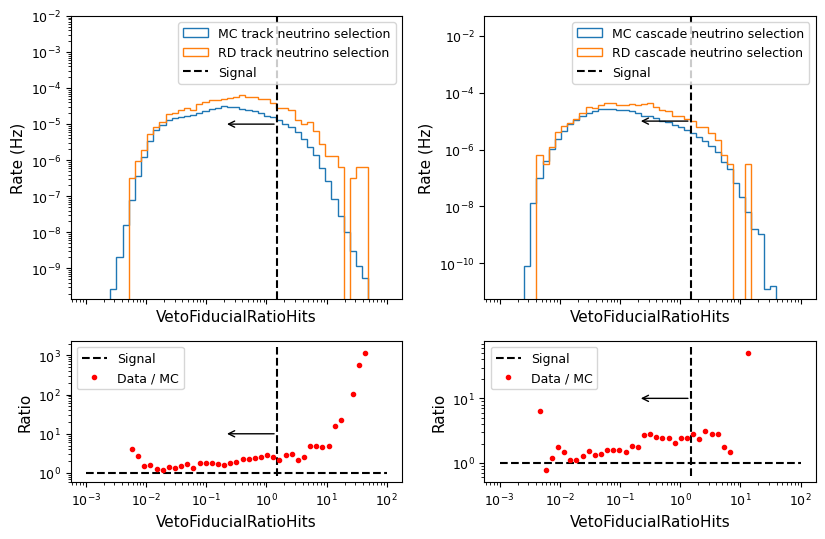

In [141]:


column = 'VetoFiducialRatioHits'
bins = np.logspace(-3,2,50)

print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 1.5
top_arrow = 10**(-5)
lenght_arrow = -1.3
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,0].set_yscale('log')
axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 1.5
top_arrow = 10**(-5)
lenght_arrow = -1.3
axs[0,1].set_ylim(top=5*10**(-2))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')




[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


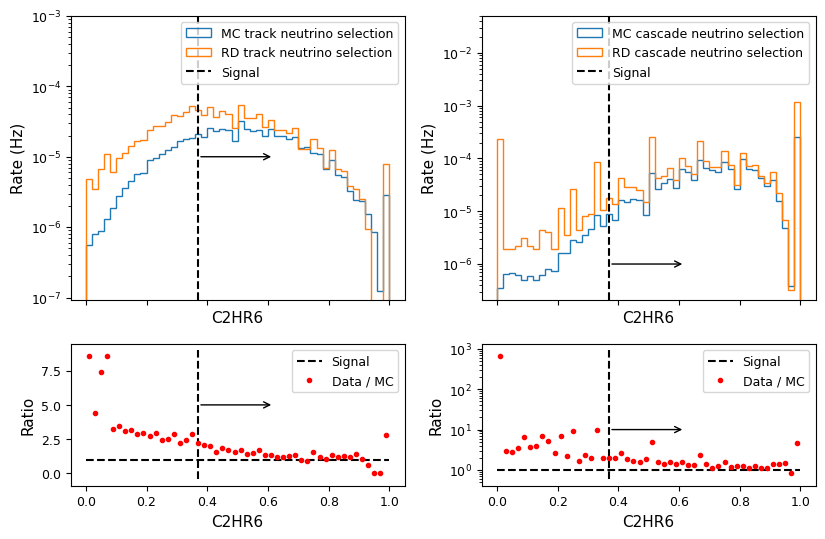

In [125]:


column = 'C2HR6'
bins = np.linspace(0,1,51)


print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 0.37
top_arrow = 10**(-5)
lenght_arrow = 0.25
axs[0,0].set_ylim(top=10**(-3))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 5
#axs[1,0].set_yscale('log')
#axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 0.37
top_arrow = 10**(-6)
lenght_arrow = 0.25
axs[0,1].set_ylim(top=5*10**(-2))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
#axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')





[-0.5  0.5  1.5]


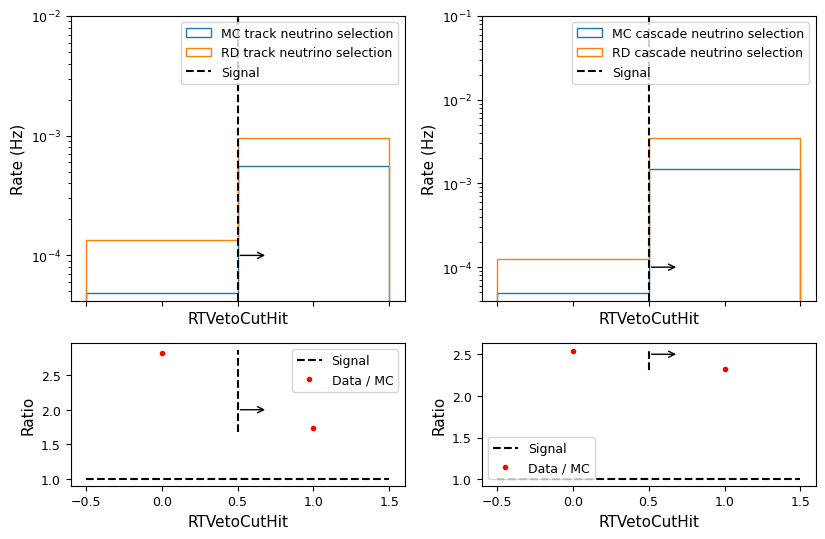

In [130]:

column = 'RTVetoCutHit'
bins = np.linspace(-0.5,1.5,3)


print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 0.5
top_arrow = 10**(-4)
lenght_arrow = 0.2
axs[0,0].set_ylim(top=10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 2
#axs[1,0].set_yscale('log')
#axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 0.5
top_arrow = 10**(-4)
lenght_arrow = 0.2
axs[0,1].set_ylim(top=10**(-1))

axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')

axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 2.5
#axs[1,1].set_yscale('log')
#axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)

axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')





[   0.  400.  800. 1200. 1600. 2000. 2400. 2800. 3200. 3600.]


/tmp/ipykernel_25642/302339923.py:36: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/302339923.py:36: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/302339923.py:73: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/302339923.py:73: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


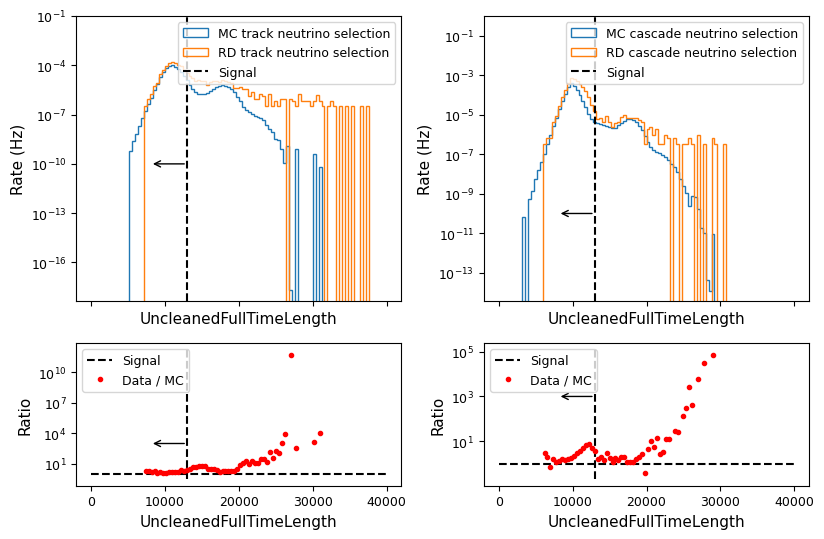

In [135]:


column = 'UncleanedFullTimeLength'
bins = np.linspace(0,40000,101)



print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 13000
top_arrow = 10**(-10)
lenght_arrow = -5000
axs[0,0].set_ylim(top=10**(-1))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 1000
axs[1,0].set_yscale('log')
#axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 13000
top_arrow = 10**(-10)
lenght_arrow = -5000
axs[0,1].set_ylim(top=10**(0))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 1000
axs[1,1].set_yscale('log')
#axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')




[   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800.]


/tmp/ipykernel_25642/1775967732.py:36: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1775967732.py:36: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1775967732.py:73: RuntimeWarning: divide by zero encountered in divide
  ratio = RD_counts/MC_counts
/tmp/ipykernel_25642/1775967732.py:73: RuntimeWarning: invalid value encountered in divide
  ratio = RD_counts/MC_counts


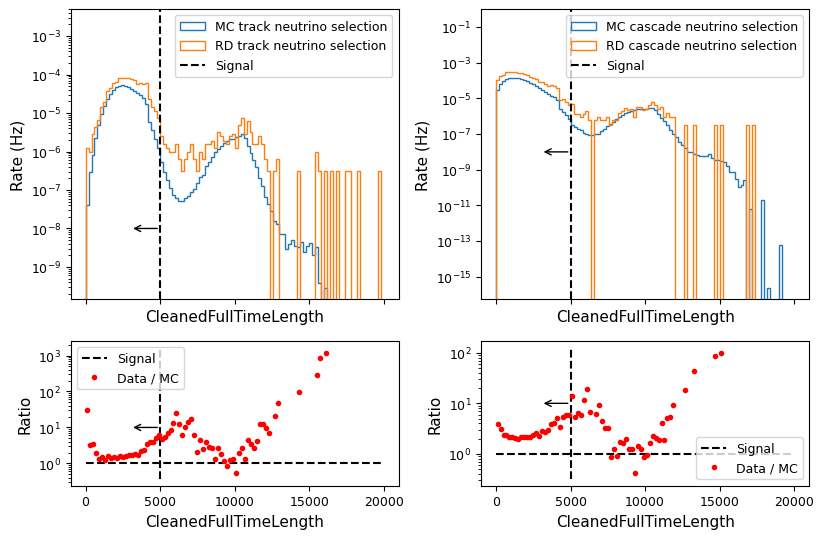

In [140]:

column = 'CleanedFullTimeLength'
bins = np.linspace(0,20000,101)



print(bins[:10])
bins_middle = (bins[1:]+bins[:-1])/2
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.8
figure_size_xfrac = 1.5

fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
MC_counts, _ ,_ =axs[0,0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ =axs[0,0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=False)




axs[0,0].set_xlabel(f'{column}')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(top=1)

cut = 5000
top_arrow = 10**(-8)
lenght_arrow = -2000
axs[0,0].set_ylim(top=0.5*10**(-2))
ylimits = axs[0,0].get_ylim()
axs[0,0].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,0].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,0].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,0].set_yscale('log')
#axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(f'{column}')
axs[1,0].set_ylabel('Ratio')
axs[1,0].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
ylimits_1 = axs[1,0].get_ylim()
axs[1,0].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,0].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,0].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,0].set_xlim(right=10)
#axs[1,0].set_ylim(top=2,bottom=0)
axs[1,0].legend()



MC_counts, _ ,_ = axs[0,1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC.to_list())],histtype='step',density=False)
RD_counts, _ ,_ = axs[0,1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=False)
axs[0,1].set_xlabel(f'{column}')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(top=1)

cut = 5000
top_arrow = 10**(-8)
lenght_arrow = -2000
axs[0,1].set_ylim(top=10**(0))
ylimits = axs[0,1].get_ylim()
axs[0,1].vlines(cut,ylimits[0],ylimits[1],color='black',label='Signal',linestyles='dashed')
axs[0,1].annotate("", xy=(cut+lenght_arrow, top_arrow), xytext=(cut, top_arrow),
            arrowprops=dict(arrowstyle="->"))


axs[0,1].legend(ncol=1, loc='upper right')

ratio = RD_counts/MC_counts
ratio_top_arrow = 10
axs[1,1].set_yscale('log')
#axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(f'{column}')
axs[1,1].set_ylabel('Ratio')
axs[1,1].errorbar(bins_middle,ratio,fmt='.',color='red',label='Data / MC')
#axs[1,1].set_ylim(top=2,bottom=0)
ylimits_1 = axs[1,1].get_ylim()
axs[1,1].vlines(cut,ylimits_1[0],ylimits_1[1],color='black',label='Signal',linestyles='dashed')
axs[1,1].hlines(1,np.min(bins),np.max(bins),color='k',linestyles='dashed')
axs[1,1].annotate("", xy=(cut+lenght_arrow, ratio_top_arrow), xytext=(cut, ratio_top_arrow),
            arrowprops=dict(arrowstyle="->"))
#axs[1,1].set_xlim(right=10)

axs[1,1].legend()


fig.tight_layout()
fig.savefig(outdir_comparison + f'{column}',bbox_inches='tight')




In [46]:
lvl3_pass_events_MC = lvl3_variables_MC_plot['event_no'][lvl3_variables_MC_plot['L3_oscNext_bool']==1]
lvl3_pass_events_RD = lvl3_variables_RD_plot['event_no'][lvl3_variables_RD_plot['L3_oscNext_bool']==1]
outdir_comparison_after_bool = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/lvl3_variables_distributions/after_lvl_3_bool_track_cascade_selection_MC_RD_lvl3_variables_comparison/"

In [47]:
pure_track_selection_MC_after_bool = pd.merge(pure_track_selection_MC,lvl3_pass_events_MC,on='event_no',how='inner')
pure_cascade_selection_MC_after_bool = pd.merge(pure_cascade_selection_MC,lvl3_pass_events_MC,on='event_no',how='inner')
pure_track_selection_RD_after_bool = pd.merge(pure_track_selection_RD,lvl3_pass_events_RD,on='event_no',how='inner')
pure_cascade_selection_RD_after_bool = pd.merge(pure_cascade_selection_RD,lvl3_pass_events_RD,on='event_no',how='inner')
pure_track_selection_MC_after_bool = pure_track_selection_MC_after_bool['event_no']
pure_cascade_selection_MC_after_bool = pure_cascade_selection_MC_after_bool['event_no']
pure_track_selection_RD_after_bool = pure_track_selection_RD_after_bool['event_no']
pure_cascade_selection_RD_after_bool = pure_cascade_selection_RD_after_bool['event_no']

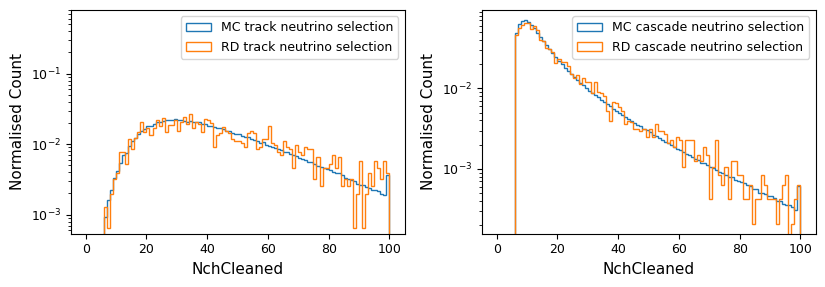

In [48]:

column = 'NchCleaned'
bins = np.linspace(0,100,101)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.8)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')


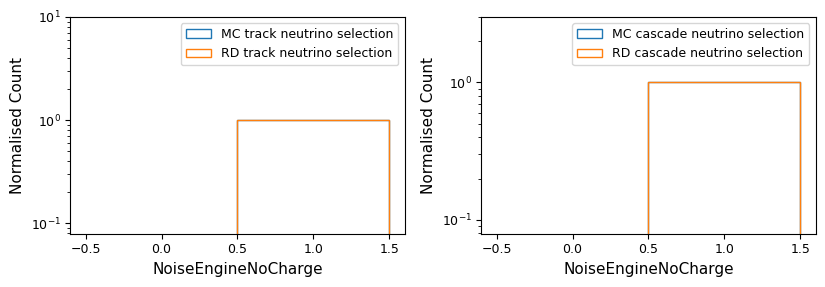

In [49]:

column = 'NoiseEngineNoCharge'
bins = np.linspace(-0.5,1.5,3)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=3)
axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

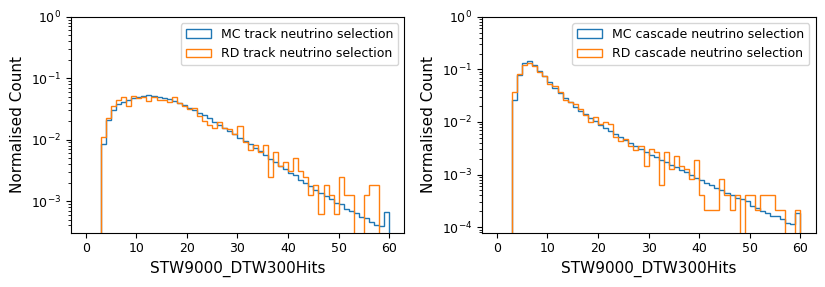

In [50]:

column = 'STW9000_DTW300Hits'
bins = np.linspace(0,60,61)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=1)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

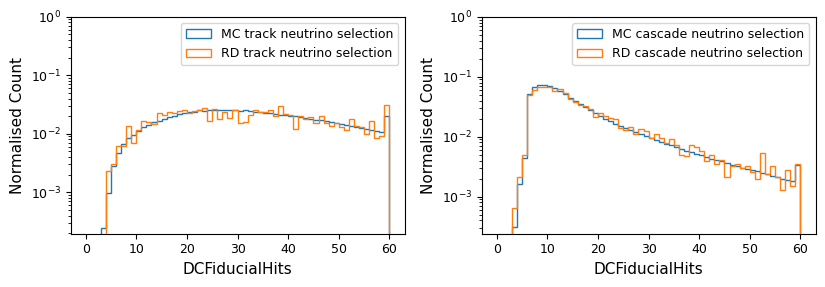

In [51]:

column = 'DCFiducialHits'
bins = np.linspace(0,60,61)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=1)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

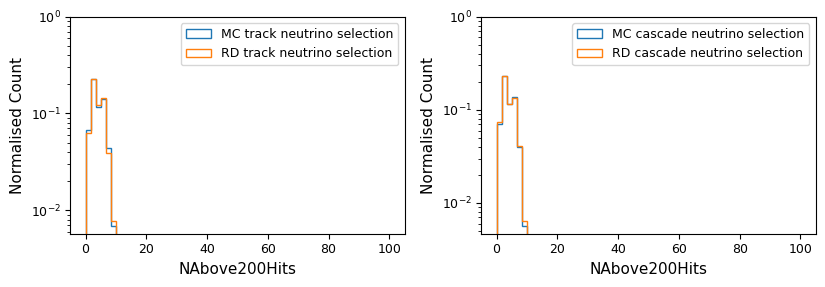

In [52]:

column = 'NAbove200Hits'
bins = np.linspace(0,100,61)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=1)
axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

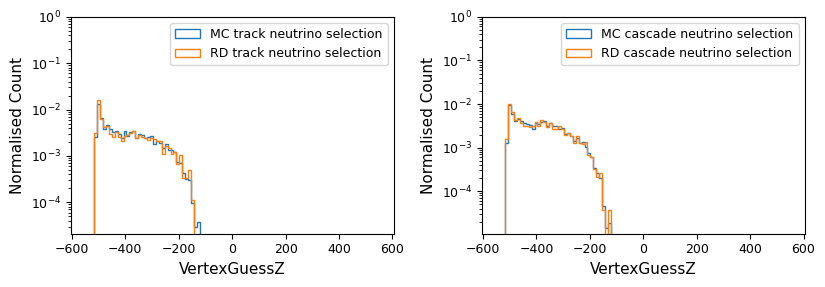

In [53]:

column = 'VertexGuessZ'
bins = np.linspace(-550,550,101)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=1)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

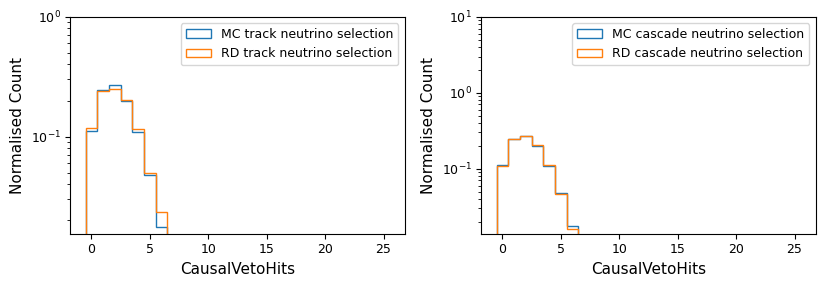

In [54]:

column = 'CausalVetoHits'
bins = np.linspace(-0.5,25.5,27)#np.linspace(-0.5,9.5,11)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=10)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

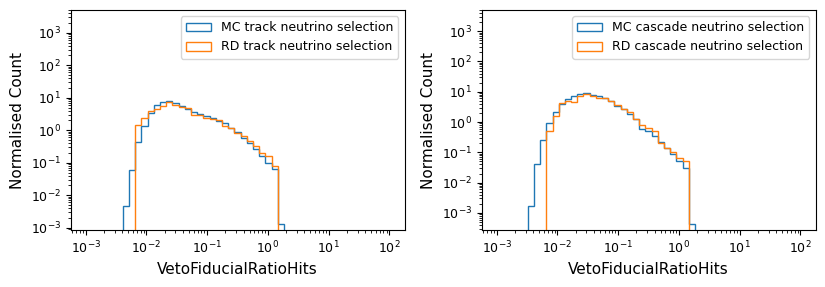

In [55]:

column = 'VetoFiducialRatioHits'
bins = np.logspace(-3,2,50)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylim(top=5000)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_ylim(top=5000)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

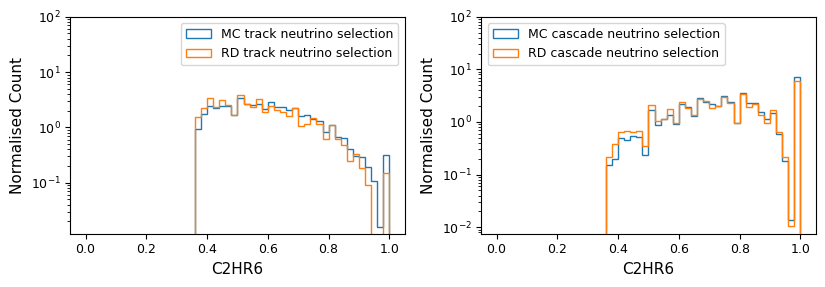

In [56]:

column = 'C2HR6'
bins = np.linspace(-0,1,51)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=100)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=100)

axs[1].legend(ncol=1, loc='upper left')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

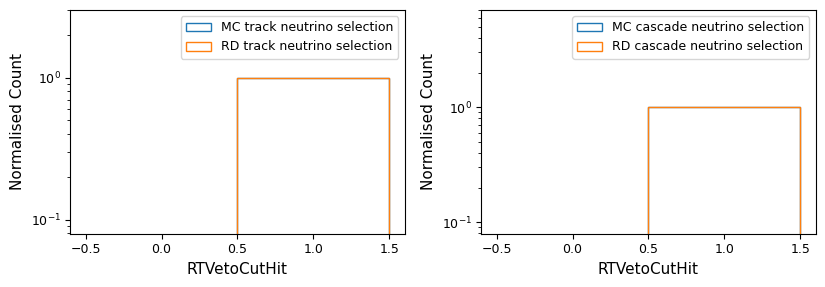

In [57]:

column = 'RTVetoCutHit'
bins = np.linspace(-0.5,1.5,3)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=3)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=7)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

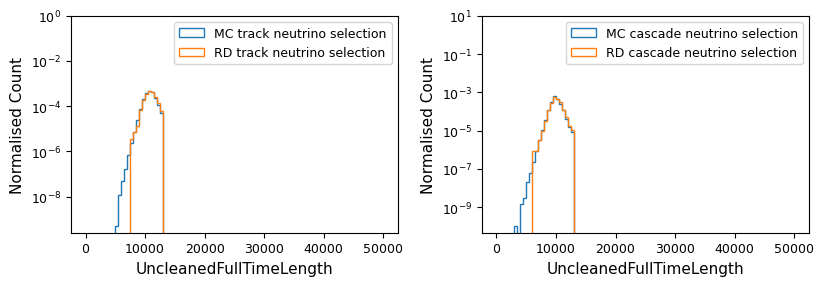

In [58]:

column = 'UncleanedFullTimeLength'
bins = np.linspace(0,50000,101)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=10)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')

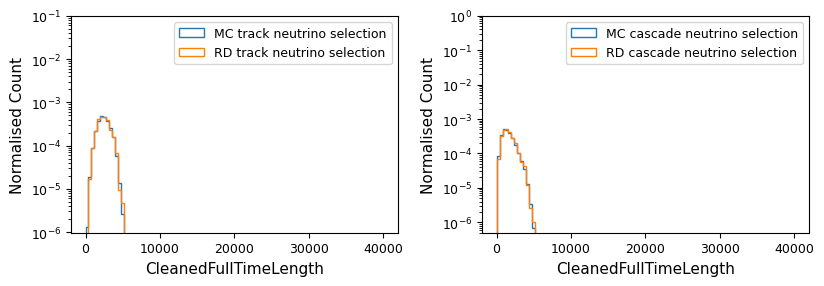

In [59]:

column = 'CleanedFullTimeLength'
bins = np.linspace(0,40000,101)
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))
axs[0].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],bins=bins,label='MC track neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_track_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[0].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_track_selection_RD_after_bool.to_list())],bins=bins,label='RD track neutrino selection',histtype='step',density=True)
axs[0].set_xlabel(f'{column}')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1)
axs[0].legend(ncol=1, loc='upper right')

axs[1].hist(lvl3_variables_MC_plot[column][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],bins=bins,label='MC cascade neutrino selection',weights=lvl3_variables_MC_plot['osc_weight'][lvl3_variables_MC_plot['event_no'].isin(pure_cascade_selection_MC_after_bool.to_list())],histtype='step',density=True)
axs[1].hist(lvl3_variables_RD_plot[column][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],weights=lvl3_variables_RD_plot['osc_weight'][lvl3_variables_RD_plot['event_no'].isin(pure_cascade_selection_RD_after_bool.to_list())],bins=bins,label='RD cascade neutrino selection',histtype='step',density=True)
axs[1].set_xlabel(f'{column}')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=1)

axs[1].legend(ncol=1, loc='upper right')
fig.tight_layout()
fig.savefig(outdir_comparison_after_bool + f'{column}',bbox_inches='tight')